In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import compute_or_load_fdr_matrix, estimate_beta

In [9]:
# Load cached data
if not os.path.exists('../data'):
    os.system('gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz')
    os.system('tar -xf ../data.tar.gz -C ../')
    os.system('rm ../data.tar.gz')

data = np.load('../data/polyps/polyps-pranet.npz')
sgmd = data['sgmd']
gt_masks = data['targets']

# Setup
alpha = 0.1
theta_grid = np.linspace(0, 1, 100)
n_bootstrap = 100

# Precompute FDR matrix for all data
fdr_matrix_full = compute_or_load_fdr_matrix(sgmd, gt_masks, theta_grid, verbose=True)
n_total = len(fdr_matrix_full)
print(f"Total samples: {n_total}")

Loaded FDR matrix from cache: 1798 images x 100 thetas
Total samples: 1798


In [10]:
# Estimate beta for different values of n
n_values = [100, 200, 500, 1000]
betas = []

for n in n_values:
    idx = np.random.choice(n_total, size=n, replace=False)
    fdr_matrix_sample = fdr_matrix_full[idx]
    beta = estimate_beta(fdr_matrix_sample, alpha, theta_grid, n_bootstrap, method="def")
    betas.append(beta)
    print(f"n={n}: beta={beta}")

n=100: beta=0.000621525801286084
n=200: beta=0.0004159123572270861
n=500: beta=0.00018689485454538552
n=1000: beta=0.00010581401167420544


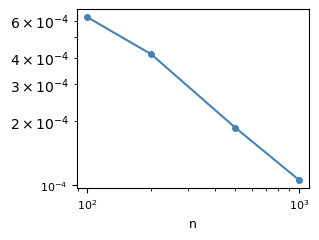

In [11]:
# Plot beta vs n
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(n_values, betas, 'o-', color='steelblue', markersize=4, linewidth=1.5)
ax.set_xlabel('n', fontsize=9)
ax.tick_params(axis='both', labelsize=8)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal', 'box')
os.makedirs('./plots', exist_ok=True)
plt.savefig('./plots/fdr_beta_vs_n.pdf', dpi=300, bbox_inches='tight')
plt.show()